In [29]:
import pandas as pd

In [2]:
df = pd.read_csv("data/500hits.csv", encoding="latin-1")
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [3]:
df.drop(columns=['PLAYER','CS'], inplace=True)
df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


In [4]:
df.describe().round(3)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000
mean,17.049,2048.699,7511.456,1150.314,2170.247,380.953,78.555,201.049,894.260,783.561,847.471,195.905,0.289,0.329
std,2.765,354.392,1294.066,289.635,424.191,96.483,49.363,143.623,486.193,327.432,489.224,181.846,0.021,0.475
min,11.000,1331.000,4981.000,601.000,1660.000,177.000,3.000,9.000,0.000,239.000,0.000,7.000,0.246,0.000
25%,15.000,1802.000,6523.000,936.000,1838.000,312.000,41.000,79.000,640.000,535.000,436.000,63.000,0.273,0.000
50%,17.000,1993.000,7241.000,1104.000,2076.000,366.000,67.000,178.000,968.000,736.000,825.000,137.000,0.287,0.000
75%,19.000,2247.000,8180.000,1296.000,2375.000,436.000,107.000,292.000,1206.000,955.000,1226.000,285.000,0.300,1.000
max,26.000,3308.000,12364.000,2295.000,4189.000,792.000,309.000,755.000,2297.000,2190.000,2597.000,1406.000,0.366,2.000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

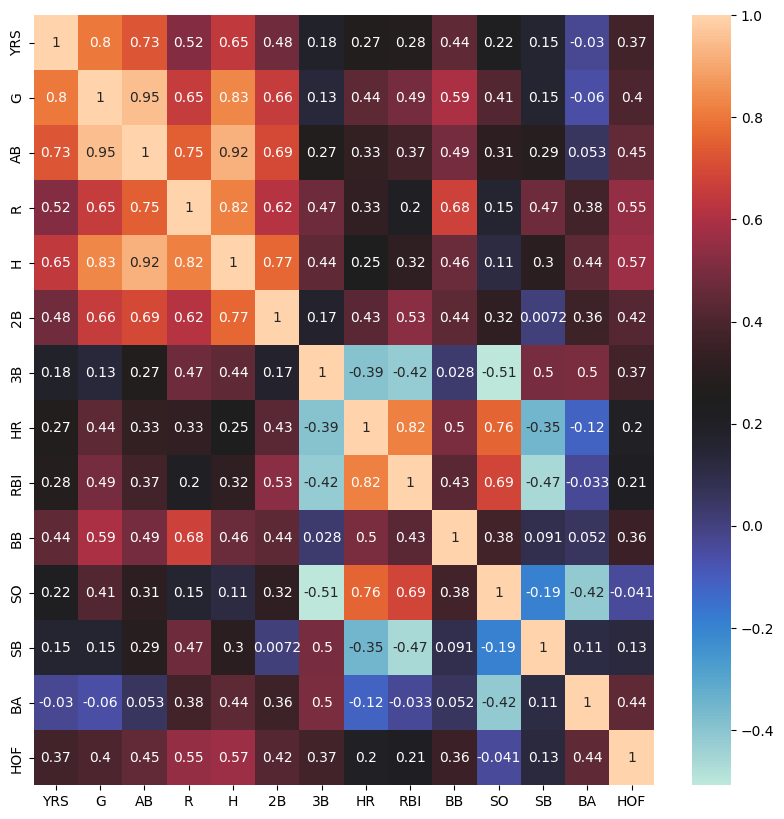

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="icefire")
plt.show()

In [8]:
X = df.drop(columns=['HOF'])
y = df['HOF']

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc = DecisionTreeClassifier()

In [14]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [15]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = dtc.predict(X_test)

In [17]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0])

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cnf = confusion_matrix(y_test, y_pred)

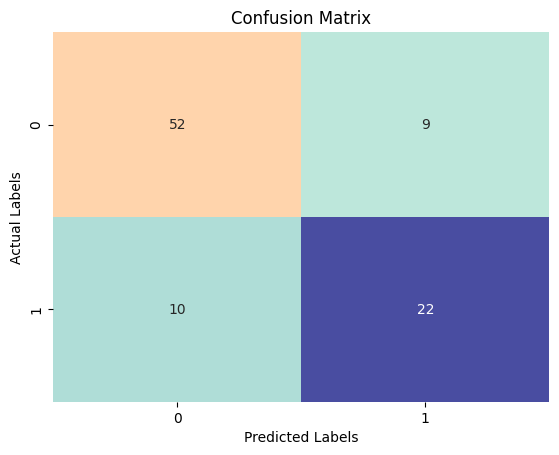

In [21]:
sns.heatmap(cnf, annot=True, cmap="icefire", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [22]:
from sklearn.metrics import classification_report

In [23]:
clf = classification_report(y_test,y_pred, digits=2, output_dict=True)
clf_df = pd.DataFrame(clf).T
clf_df = clf_df.astype(float).round(3)
clf_df['support'] = clf_df['support'].apply(int)

In [25]:
clf_df

,precision,recall,f1-score,support
0,0.839,0.852,0.846,61
1,0.710,0.688,0.698,32
accuracy,0.796,0.796,0.796,0
macro avg,0.774,0.770,0.772,93
weighted avg,0.794,0.796,0.795,93


In [26]:
dtc.feature_importances_

array([0.03546912, 0.04100016, 0.02869469, 0.05593063, 0.38574252,
       0.04325963, 0.05217487, 0.01531671, 0.09947796, 0.05944383,
       0.0373047 , 0.04980063, 0.09638455])

In [27]:
feature_imp = pd.DataFrame(dtc.feature_importances_, index = X.columns)

In [28]:
feature_imp

,0
YRS,0.035469
G,0.041000
AB,0.028695
R,0.055931
H,0.385743
2B,0.043260
3B,0.052175
HR,0.015317
RBI,0.099478
BB,0.059444
